# Logistic_classfication

## (Binary) classfication
Regression은 숫자를 예측하는 것이라면, <br>
**Binary classfication**은, 두개의 카테고리에서 하나, 정해진 카테고리를 고른다.
* Spam Detection: Spam or Ham <br>
Spam(1) or Ham(0)
* Facebook feed: show or hide <br>
좋아요로 학습을해서 이것으로 학습해서 만들어지는 수백개의 timeline중에 보여주고 보여주지 않을 것을 결정한다.  
show(1) or hide(0)
* Credit Card Fraudulent Transaction detection: legitimate/fraud 
신용카드 도난, 기존에 사용하던 pattern을 이용(사용하는 pattern을 잘 학습해서)해서 도난여부를 알 수 있음.<br>
legitimate(0) or fraud(1) <br>
* 주식시장에서 주식을 살까말까를 결정한다. (이전의 동향에서 학습을 한 후) <br>
* 이 학생이 몇 시간 공부하더니 시험에서 떨어지더라 붙더라 <br>
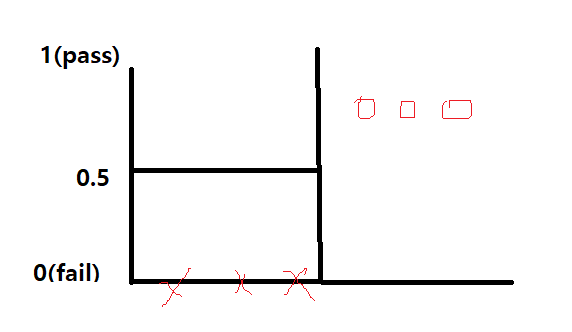


## Logistic Classification을 Linear Regression으로 나타냈을 때 문제
### 1. Input 범위에 따라 Linear regression선의 위치가 이동해서 합격/불합격의 기준이 달라진다. 
![image.png](linear_regression_problem.png)
### 2. 0과 1사이의 값이 나와야 한다. 
w = 0.5, b = 0, (X = [1, 2, 5, 10]) <br>
모델을 적용하려고 할 때 , x = 100이면, y = 50.. 
> 0과 1로 압축시켜주는 함수가 있으면 좋겠다. <br>
=> logistic function, sigmoid function. <br>
sigmoid: 
\\(g(z) = \frac{1}{(1+e^{-z})}\\)
<br>
\\(e^{-z}\\)이 0에 가까워지면, 1이되고, <br>
\\(e^{-z}\\)이 무한에 커지면 0에 가까워진다. <br>

![image.png](sigmoid.png)

In [3]:
import tensorflow as tf
tf.set_random_seed(777)
# 1시간 동안 비디오 2개.. 
x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

In [6]:
X = tf.placeholder(tf.float32, shape=[None, 2]) # x feature 2개, 2개씩
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([2, 1]), name='weight') # x feature는 2개 나가는 건 1
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.sigmoid(tf.matmul(X , W) + b)
cost = -tf.reduce_mean(Y * tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [7]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
# casting하면 ture 는 1, false는 0이된다.
# 예측한 값들이 얼마나 정확한지 H(x), y값이 똑같은지 
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val)
        
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                      feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y):", c, "\nAcurracy:", a)
        


0 2.5264485
1 2.5044515
2 2.4824836
3 2.4605305
4 2.4386117
5 2.4167264
6 2.3948653
7 2.3730476
8 2.3512585
9 2.3295083
10 2.3077977
11 2.2861264
12 2.264502
13 2.2429266
14 2.2213976
15 2.1999214
16 2.1785028
17 2.157143
18 2.13584
19 2.1146057
20 2.0934408
21 2.0723503
22 2.051336
23 2.0304046
24 2.0095599
25 1.9888062
26 1.968151
27 1.9475976
28 1.9271551
29 1.9068252
30 1.8866172
31 1.8665336
32 1.8465881
33 1.826784
34 1.8071288
35 1.787633
36 1.768302
37 1.7491454
38 1.730172
39 1.711391
40 1.6928123
41 1.6744442
42 1.6562977
43 1.6383805
44 1.620705
45 1.6032801
46 1.5861157
47 1.5692226
48 1.5526086
49 1.5362858
50 1.5202631
51 1.5045484
52 1.4891511
53 1.4740801
54 1.4593415
55 1.4449439
56 1.4308933
57 1.4171944
58 1.4038539
59 1.3908738
60 1.3782573
61 1.3660077
62 1.3541247
63 1.3426094
64 1.3314596
65 1.3206747
66 1.3102504
67 1.3001839
68 1.2904693
69 1.2811018
70 1.2720741
71 1.2633793
72 1.2550093
73 1.246956
74 1.2392093
75 1.2317609
76 1.2245995
77 1.2177161
78 1.2110

725 0.57084274
726 0.57062
727 0.5703978
728 0.5701762
729 0.56995505
730 0.5697345
731 0.5695145
732 0.569295
733 0.569076
734 0.5688576
735 0.56863976
736 0.5684224
737 0.5682056
738 0.5679892
739 0.56777334
740 0.5675581
741 0.5673433
742 0.56712896
743 0.56691515
744 0.56670195
745 0.56648916
746 0.56627697
747 0.56606525
748 0.5658539
749 0.5656431
750 0.56543285
751 0.5652231
752 0.5650137
753 0.5648049
754 0.56459653
755 0.56438875
756 0.5641814
757 0.5639745
758 0.563768
759 0.56356215
760 0.56335664
761 0.5631516
762 0.56294703
763 0.56274295
764 0.5625393
765 0.5623362
766 0.5621335
767 0.56193125
768 0.56172943
769 0.5615281
770 0.5613272
771 0.56112677
772 0.56092674
773 0.5607272
774 0.56052804
775 0.56032944
776 0.5601312
777 0.55993336
778 0.559736
779 0.559539
780 0.55934256
781 0.55914646
782 0.55895084
783 0.5587556
784 0.5585608
785 0.5583665
786 0.5581724
787 0.55797887
788 0.55778575
789 0.55759305
790 0.55740076
791 0.55720884
792 0.5570174
793 0.5568263
794 0.556

1293 0.49002454
1294 0.48992285
1295 0.4898211
1296 0.48971963
1297 0.4896181
1298 0.48951662
1299 0.4894152
1300 0.48931396
1301 0.48921272
1302 0.48911154
1303 0.48901042
1304 0.48890936
1305 0.48880848
1306 0.48870745
1307 0.4886067
1308 0.48850596
1309 0.4884052
1310 0.48830462
1311 0.48820397
1312 0.48810354
1313 0.48800316
1314 0.48790273
1315 0.48780236
1316 0.48770222
1317 0.48760197
1318 0.4875019
1319 0.48740187
1320 0.48730198
1321 0.48720202
1322 0.48710218
1323 0.48700234
1324 0.4869027
1325 0.48680303
1326 0.4867035
1327 0.48660398
1328 0.48650447
1329 0.48640504
1330 0.48630586
1331 0.4862065
1332 0.48610735
1333 0.4860082
1334 0.48590913
1335 0.48581013
1336 0.4857112
1337 0.48561227
1338 0.48551345
1339 0.4854147
1340 0.485316
1341 0.48521736
1342 0.48511884
1343 0.4850203
1344 0.4849218
1345 0.48482347
1346 0.48472515
1347 0.4846269
1348 0.4845287
1349 0.48443052
1350 0.48433244
1351 0.48423445
1352 0.48413643
1353 0.4840386
1354 0.4839407
1355 0.48384288
1356 0.48374

1885 0.43804595
1886 0.437968
1887 0.43788996
1888 0.4378121
1889 0.43773413
1890 0.4376564
1891 0.43757853
1892 0.43750063
1893 0.4374229
1894 0.43734512
1895 0.43726733
1896 0.43718967
1897 0.43711188
1898 0.43703425
1899 0.43695655
1900 0.43687895
1901 0.43680134
1902 0.4367238
1903 0.43664625
1904 0.4365687
1905 0.43649116
1906 0.43641376
1907 0.4363363
1908 0.43625882
1909 0.4361814
1910 0.43610406
1911 0.43602678
1912 0.43594944
1913 0.43587205
1914 0.43579474
1915 0.43571758
1916 0.4356403
1917 0.435563
1918 0.43548593
1919 0.43540874
1920 0.4353316
1921 0.43525442
1922 0.43517736
1923 0.4351004
1924 0.43502328
1925 0.43494627
1926 0.43486926
1927 0.4347923
1928 0.43471536
1929 0.43463835
1930 0.4345615
1931 0.4344847
1932 0.4344078
1933 0.43433094
1934 0.43425414
1935 0.4341774
1936 0.43410063
1937 0.4340239
1938 0.43394718
1939 0.43387052
1940 0.4337938
1941 0.43371716
1942 0.43364063
1943 0.43356395
1944 0.4334874
1945 0.4334108
1946 0.43333435
1947 0.4332578
1948 0.43318138


2483 0.3952309
2484 0.39516506
2485 0.39509913
2486 0.39503315
2487 0.39496732
2488 0.39490148
2489 0.3948356
2490 0.39476976
2491 0.3947039
2492 0.39463818
2493 0.3945724
2494 0.39450657
2495 0.3944409
2496 0.39437518
2497 0.39430943
2498 0.39424372
2499 0.39417812
2500 0.39411238
2501 0.39404675
2502 0.39398113
2503 0.39391556
2504 0.39384988
2505 0.39378437
2506 0.3937188
2507 0.3936533
2508 0.39358774
2509 0.39352226
2510 0.39345673
2511 0.39339128
2512 0.39332578
2513 0.3932604
2514 0.39319494
2515 0.39312956
2516 0.39306414
2517 0.3929988
2518 0.3929335
2519 0.39286807
2520 0.39280283
2521 0.39273748
2522 0.3926722
2523 0.39260697
2524 0.39254165
2525 0.39247644
2526 0.39241126
2527 0.39234605
2528 0.39228085
2529 0.39221564
2530 0.39215052
2531 0.39208534
2532 0.39202031
2533 0.39195517
2534 0.39189005
2535 0.39182508
2536 0.39176
2537 0.391695
2538 0.39162993
2539 0.39156494
2540 0.3914999
2541 0.39143503
2542 0.3913701
2543 0.39130512
2544 0.3912402
2545 0.39117527
2546 0.3911

3159 0.35429347
3160 0.354238
3161 0.35418248
3162 0.35412693
3163 0.3540715
3164 0.35401607
3165 0.35396054
3166 0.3539051
3167 0.35384965
3168 0.3537943
3169 0.35373887
3170 0.35368347
3171 0.35362813
3172 0.35357273
3173 0.35351738
3174 0.35346207
3175 0.3534068
3176 0.35335144
3177 0.35329616
3178 0.35324088
3179 0.35318562
3180 0.35313037
3181 0.35307512
3182 0.35301986
3183 0.35296473
3184 0.35290954
3185 0.35285434
3186 0.3527991
3187 0.35274398
3188 0.35268888
3189 0.3526337
3190 0.35257867
3191 0.35252348
3192 0.35246846
3193 0.3524134
3194 0.3523583
3195 0.3523033
3196 0.35224828
3197 0.35219327
3198 0.35213825
3199 0.3520832
3200 0.35202825
3201 0.35197338
3202 0.35191837
3203 0.35186347
3204 0.35180855
3205 0.3517536
3206 0.35169873
3207 0.35164383
3208 0.351589
3209 0.35153416
3210 0.3514793
3211 0.3514245
3212 0.35136974
3213 0.35131493
3214 0.35126004
3215 0.35120535
3216 0.35115054
3217 0.3510958
3218 0.3510411
3219 0.35098645
3220 0.35093167
3221 0.35087705
3222 0.3508

3774 0.32263085
3775 0.3225832
3776 0.32253557
3777 0.32248798
3778 0.3224404
3779 0.32239276
3780 0.32234517
3781 0.3222976
3782 0.32225
3783 0.3222025
3784 0.3221549
3785 0.3221074
3786 0.3220599
3787 0.32201234
3788 0.32196483
3789 0.32191738
3790 0.32186994
3791 0.32182246
3792 0.321775
3793 0.32172754
3794 0.32168013
3795 0.3216327
3796 0.32158533
3797 0.32153788
3798 0.32149056
3799 0.32144317
3800 0.32139578
3801 0.3213485
3802 0.3213012
3803 0.3212538
3804 0.32120648
3805 0.3211592
3806 0.3211119
3807 0.32106462
3808 0.32101738
3809 0.32097015
3810 0.32092288
3811 0.32087564
3812 0.32082844
3813 0.3207812
3814 0.32073405
3815 0.32068688
3816 0.32063964
3817 0.32059255
3818 0.3205454
3819 0.32049823
3820 0.3204511
3821 0.32040402
3822 0.3203569
3823 0.3203098
3824 0.32026276
3825 0.32021567
3826 0.32016858
3827 0.32012156
3828 0.32007456
3829 0.3200275
3830 0.3199805
3831 0.31993356
3832 0.31988657
3833 0.31983957
3834 0.31979263
3835 0.3197457
3836 0.31969878
3837 0.31965178
38

4344 0.29727882
4345 0.29723734
4346 0.2971959
4347 0.29715446
4348 0.297113
4349 0.2970716
4350 0.29703015
4351 0.2969888
4352 0.29694736
4353 0.29690602
4354 0.29686466
4355 0.2968233
4356 0.29678193
4357 0.29674056
4358 0.29669926
4359 0.29665795
4360 0.2966167
4361 0.2965753
4362 0.29653403
4363 0.2964928
4364 0.29645148
4365 0.29641023
4366 0.29636896
4367 0.29632774
4368 0.2962865
4369 0.2962453
4370 0.2962041
4371 0.29616287
4372 0.2961217
4373 0.29608047
4374 0.29603934
4375 0.29599816
4376 0.29595706
4377 0.29591587
4378 0.29587474
4379 0.2958336
4380 0.2957925
4381 0.29575136
4382 0.29571033
4383 0.29566923
4384 0.29562816
4385 0.2955871
4386 0.29554603
4387 0.295505
4388 0.29546398
4389 0.29542294
4390 0.29538193
4391 0.29534093
4392 0.29529995
4393 0.29525897
4394 0.29521796
4395 0.29517698
4396 0.29513606
4397 0.2950951
4398 0.2950542
4399 0.29501322
4400 0.2949724
4401 0.29493138
4402 0.29489058
4403 0.29484966
4404 0.29480878
4405 0.29476792
4406 0.2947271
4407 0.2946862

4883 0.27630976
4884 0.27627328
4885 0.27623686
4886 0.27620038
4887 0.27616397
4888 0.27612755
4889 0.27609104
4890 0.27605465
4891 0.27601826
4892 0.27598187
4893 0.2759455
4894 0.27590913
4895 0.27587274
4896 0.2758364
4897 0.27580002
4898 0.27576366
4899 0.27572733
4900 0.275691
4901 0.27565464
4902 0.2756184
4903 0.27558205
4904 0.2755458
4905 0.2755095
4906 0.2754732
4907 0.27543697
4908 0.27540067
4909 0.27536443
4910 0.27532816
4911 0.27529192
4912 0.27525568
4913 0.27521947
4914 0.2751833
4915 0.27514705
4916 0.27511093
4917 0.27507466
4918 0.27503854
4919 0.27500233
4920 0.2749662
4921 0.27493003
4922 0.27489388
4923 0.27485773
4924 0.2748216
4925 0.2747855
4926 0.27474943
4927 0.2747133
4928 0.2746772
4929 0.2746411
4930 0.27460507
4931 0.27456895
4932 0.2745329
4933 0.27449682
4934 0.27446082
4935 0.27442476
4936 0.2743888
4937 0.27435273
4938 0.27431673
4939 0.2742807
4940 0.27424476
4941 0.27420875
4942 0.2741728
4943 0.2741368
4944 0.27410087
4945 0.2740649
4946 0.274029

5494 0.25553292
5495 0.25550124
5496 0.2554696
5497 0.25543794
5498 0.2554063
5499 0.25537464
5500 0.255343
5501 0.25531134
5502 0.2552797
5503 0.2552481
5504 0.25521648
5505 0.25518492
5506 0.25515327
5507 0.25512168
5508 0.2550901
5509 0.25505856
5510 0.25502694
5511 0.25499538
5512 0.25496387
5513 0.2549323
5514 0.25490075
5515 0.25486922
5516 0.25483766
5517 0.2548062
5518 0.25477466
5519 0.2547432
5520 0.25471166
5521 0.25468013
5522 0.25464866
5523 0.25461724
5524 0.25458574
5525 0.2545543
5526 0.2545228
5527 0.2544914
5528 0.25445995
5529 0.25442854
5530 0.2543971
5531 0.25436565
5532 0.25433424
5533 0.25430286
5534 0.25427145
5535 0.25424004
5536 0.25420865
5537 0.2541773
5538 0.25414592
5539 0.25411454
5540 0.25408322
5541 0.25405183
5542 0.25402048
5543 0.25398916
5544 0.25395787
5545 0.25392652
5546 0.2538952
5547 0.25386393
5548 0.2538326
5549 0.25380132
5550 0.25377008
5551 0.2537388
5552 0.25370747
5553 0.2536762
5554 0.25364497
5555 0.25361374
5556 0.25358248
5557 0.2535

6025 0.23967086
6026 0.2396427
6027 0.23961459
6028 0.23958637
6029 0.23955834
6030 0.23953015
6031 0.23950203
6032 0.23947388
6033 0.2394458
6034 0.23941769
6035 0.23938958
6036 0.23936151
6037 0.23933345
6038 0.23930536
6039 0.23927726
6040 0.23924923
6041 0.2392212
6042 0.23919308
6043 0.23916505
6044 0.23913701
6045 0.23910902
6046 0.23908095
6047 0.23905294
6048 0.23902489
6049 0.23899691
6050 0.23896891
6051 0.23894095
6052 0.23891294
6053 0.23888494
6054 0.23885697
6055 0.23882897
6056 0.23880099
6057 0.23877306
6058 0.23874505
6059 0.23871718
6060 0.2386892
6061 0.23866127
6062 0.23863333
6063 0.23860542
6064 0.23857749
6065 0.23854959
6066 0.23852168
6067 0.23849376
6068 0.2384659
6069 0.23843797
6070 0.23841012
6071 0.2383822
6072 0.23835437
6073 0.23832649
6074 0.2382986
6075 0.23827077
6076 0.23824297
6077 0.2382151
6078 0.2381873
6079 0.2381594
6080 0.2381316
6081 0.23810379
6082 0.23807597
6083 0.2380482
6084 0.23802038
6085 0.23799257
6086 0.2379648
6087 0.23793703
6088 

6660 0.22295953
6661 0.22293496
6662 0.22291039
6663 0.22288585
6664 0.22286125
6665 0.22283666
6666 0.2228121
6667 0.22278756
6668 0.222763
6669 0.22273844
6670 0.22271393
6671 0.2226894
6672 0.22266483
6673 0.22264032
6674 0.2226158
6675 0.2225913
6676 0.22256683
6677 0.22254229
6678 0.2225178
6679 0.2224933
6680 0.22246884
6681 0.22244434
6682 0.22241986
6683 0.22239535
6684 0.22237092
6685 0.22234647
6686 0.22232199
6687 0.22229755
6688 0.22227313
6689 0.22224866
6690 0.22222422
6691 0.22219978
6692 0.22217537
6693 0.22215094
6694 0.22212648
6695 0.22210215
6696 0.22207771
6697 0.22205333
6698 0.22202893
6699 0.22200449
6700 0.22198015
6701 0.22195573
6702 0.22193132
6703 0.22190702
6704 0.22188266
6705 0.22185828
6706 0.22183393
6707 0.22180957
6708 0.22178523
6709 0.22176088
6710 0.22173654
6711 0.22171225
6712 0.22168793
6713 0.22166358
6714 0.22163923
6715 0.22161496
6716 0.22159064
6717 0.22156632
6718 0.22154205
6719 0.22151776
6720 0.22149348
6721 0.22146921
6722 0.22144492


7181 0.2108128
7182 0.21079068
7183 0.21076854
7184 0.21074647
7185 0.21072435
7186 0.21070229
7187 0.2106802
7188 0.21065813
7189 0.2106361
7190 0.21061403
7191 0.21059196
7192 0.2105699
7193 0.21054788
7194 0.21052583
7195 0.21050371
7196 0.21048169
7197 0.21045966
7198 0.21043767
7199 0.21041566
7200 0.21039362
7201 0.21037157
7202 0.2103496
7203 0.21032755
7204 0.21030556
7205 0.21028359
7206 0.21026157
7207 0.2102396
7208 0.21021761
7209 0.21019562
7210 0.21017365
7211 0.21015173
7212 0.21012974
7213 0.21010774
7214 0.2100858
7215 0.21006383
7216 0.21004188
7217 0.21001993
7218 0.209998
7219 0.20997606
7220 0.2099541
7221 0.2099322
7222 0.20991027
7223 0.2098884
7224 0.20986645
7225 0.20984454
7226 0.2098226
7227 0.20980076
7228 0.2097788
7229 0.20975693
7230 0.20973504
7231 0.20971318
7232 0.2096913
7233 0.20966947
7234 0.2096476
7235 0.2096257
7236 0.20960379
7237 0.20958199
7238 0.20956004
7239 0.20953827
7240 0.20951636
7241 0.20949459
7242 0.20947278
7243 0.2094509
7244 0.209

7822 0.19750561
7823 0.19748615
7824 0.19746663
7825 0.19744718
7826 0.19742769
7827 0.19740821
7828 0.19738875
7829 0.19736926
7830 0.19734979
7831 0.19733036
7832 0.19731086
7833 0.19729143
7834 0.19727199
7835 0.19725251
7836 0.1972331
7837 0.19721366
7838 0.1971942
7839 0.19717479
7840 0.19715534
7841 0.19713591
7842 0.19711648
7843 0.19709705
7844 0.19707768
7845 0.1970583
7846 0.19703887
7847 0.19701946
7848 0.19700009
7849 0.19698066
7850 0.19696128
7851 0.19694187
7852 0.1969225
7853 0.19690306
7854 0.19688372
7855 0.19686437
7856 0.19684501
7857 0.19682562
7858 0.19680627
7859 0.19678688
7860 0.19676757
7861 0.19674821
7862 0.19672889
7863 0.19670953
7864 0.19669016
7865 0.19667082
7866 0.1966515
7867 0.1966322
7868 0.19661283
7869 0.19659352
7870 0.19657421
7871 0.19655491
7872 0.19653559
7873 0.19651623
7874 0.19649696
7875 0.19647764
7876 0.19645838
7877 0.19643909
7878 0.19641982
7879 0.19640052
7880 0.19638123
7881 0.19636197
7882 0.1963427
7883 0.19632341
7884 0.19630416

8441 0.18611579
8442 0.18609841
8443 0.18608104
8444 0.18606369
8445 0.18604632
8446 0.18602896
8447 0.1860116
8448 0.18599427
8449 0.18597694
8450 0.18595959
8451 0.18594225
8452 0.18592495
8453 0.18590762
8454 0.1858903
8455 0.18587293
8456 0.18585561
8457 0.18583836
8458 0.18582104
8459 0.1858037
8460 0.18578637
8461 0.18576907
8462 0.18575178
8463 0.18573451
8464 0.18571723
8465 0.18569994
8466 0.18568265
8467 0.18566535
8468 0.18564807
8469 0.18563081
8470 0.18561351
8471 0.18559624
8472 0.18557894
8473 0.18556167
8474 0.18554437
8475 0.18552722
8476 0.18550992
8477 0.18549265
8478 0.18547542
8479 0.18545814
8480 0.18544096
8481 0.18542367
8482 0.18540646
8483 0.1853892
8484 0.18537198
8485 0.18535475
8486 0.18533753
8487 0.1853203
8488 0.18530305
8489 0.18528588
8490 0.18526866
8491 0.18525146
8492 0.18523431
8493 0.18521707
8494 0.18519986
8495 0.18518265
8496 0.18516546
8497 0.18514822
8498 0.18513107
8499 0.1851139
8500 0.1850967
8501 0.18507956
8502 0.18506236
8503 0.18504518

9052 0.17606808
9053 0.17605251
9054 0.17603694
9055 0.17602135
9056 0.17600584
9057 0.17599024
9058 0.17597467
9059 0.17595913
9060 0.17594357
9061 0.17592801
9062 0.17591248
9063 0.17589693
9064 0.17588145
9065 0.17586583
9066 0.17585035
9067 0.17583482
9068 0.17581934
9069 0.17580377
9070 0.17578824
9071 0.17577273
9072 0.17575721
9073 0.17574167
9074 0.17572613
9075 0.17571063
9076 0.17569514
9077 0.17567962
9078 0.17566411
9079 0.17564864
9080 0.17563318
9081 0.17561765
9082 0.17560215
9083 0.17558666
9084 0.17557119
9085 0.1755557
9086 0.17554022
9087 0.17552477
9088 0.17550926
9089 0.17549379
9090 0.17547828
9091 0.17546284
9092 0.17544742
9093 0.17543192
9094 0.17541647
9095 0.17540108
9096 0.17538558
9097 0.17537011
9098 0.17535467
9099 0.17533927
9100 0.17532378
9101 0.17530833
9102 0.1752929
9103 0.17527743
9104 0.17526197
9105 0.17524658
9106 0.17523117
9107 0.17521577
9108 0.17520033
9109 0.17518492
9110 0.17516954
9111 0.1751541
9112 0.17513864
9113 0.17512329
9114 0.1751

9627 0.16754325
9628 0.16752917
9629 0.16751504
9630 0.16750096
9631 0.16748685
9632 0.16747272
9633 0.16745861
9634 0.16744454
9635 0.16743046
9636 0.16741633
9637 0.16740227
9638 0.1673882
9639 0.16737407
9640 0.16736001
9641 0.16734593
9642 0.16733186
9643 0.16731775
9644 0.16730368
9645 0.16728957
9646 0.1672755
9647 0.16726142
9648 0.1672474
9649 0.16723335
9650 0.16721924
9651 0.16720527
9652 0.16719115
9653 0.16717713
9654 0.16716306
9655 0.167149
9656 0.16713499
9657 0.16712093
9658 0.16710687
9659 0.16709284
9660 0.16707878
9661 0.16706473
9662 0.16705067
9663 0.1670367
9664 0.16702266
9665 0.16700864
9666 0.16699462
9667 0.16698061
9668 0.16696657
9669 0.1669526
9670 0.16693854
9671 0.16692452
9672 0.16691057
9673 0.1668965
9674 0.16688253
9675 0.16686852
9676 0.16685446
9677 0.16684051
9678 0.16682647
9679 0.1668125
9680 0.16679852
9681 0.16678451
9682 0.16677053
9683 0.16675656
9684 0.16674262
9685 0.1667286
9686 0.16671467
9687 0.16670066
9688 0.1666867
9689 0.1666727
9690

## Logistic  Hypothesis
\\(z=WX\\) <br>
H(x) = g(z) <br>
### \\(H(x) = \frac{1}{(1+e^{-W^{T}X})}\\)

**Linear Regression Hypothesis**
<br>
\\(H(x) = Wx + b\\)<br> 

## Logistic Regression의 Cost function 
가설이 바뀌어서, Sigimoid fucntion을 사용해서 **출력값이 0에서 1사이**가 되도록 되었다. 
<br><br>
**Linear Regression** <br>
\\(cost(W, b)\\) = \\(\frac{1}{m}\sum_{i=1}^{m} (H(x^i)-y^i)^2\\) when \\(H(x) = Wx + b\\)<br> 

<br>
**Logistic Regression** <br>
> Linar Regression때의 Hyopthesis를 쓰면, 제대로 된 cost fucntion의 그림이 나온다. 하지만, Logisti Regression의 term은 더이상 linear하지 않기 때문에, 모양이 이상하게 나온다. global minimum을 찾는것이 목표지만, 어떤 지점에서 시작하느냐에 따라서 최저점(=Local minimum) 이 달라진다. <br>

\\(cost(W, b)\\) = \\(\frac{1}{m}\sum c(H(x), y)\\) <br>
### \\(c(H(x), y) = \{_{-log(1-H(x)): y = 0}^{-log(H(x)): y = 1}\\)

## Understanding cost function
\\(c(H(x), y) = \{_{-log(1-H(x)): y = 0}^{-log(H(x)): y = 1}\\)  ?
1. [exponentail](https://ko.wikipedia.org/wiki/%EC%A7%80%EC%88%98_%ED%95%A8%EC%88%98)과 상극이되는 것 log
> log함수를 사용해 구불어짐을 상쇄시켜준다.

2. Cost함수의 의미: **실제의 값과 예측한 값이 같으면 cost값은 작아진다. 예측이 틀리면 cost값을 높여서 모델에 벌을 준다. **


> **case1, 학습의 label이 1일때**<br>
![image.png](logistic_cost.png)
**\\(g(z) = -log(z) \\)** <br>
\\(y=1, H(x)=1\\), 예측이 맞았을 때, \\(cost(1)\\) <br> **cost는 0**
<br>
\\(y=1, H(x)=0\\), 예측이 틀렸을 때, \\(cost(0)\\) <br> **cost는 무한**


> **cast 2, 학습label이 0일 때**
![image.png](logistic_cost_0.png)
**\\(g(z) = -log(1-z) \\)** <br>
\\(y=0, H(x)=0\\), 예측이 맞았을 때, \\(cost(1)\\) <br> **맞는 0을 예측해서0에 가까워진다.**
<br>
\\(y=1, H(x)=0\\), 예측이 틀렸을 때, \\(cost(0)\\) <br> **1로 잘 못 예측을 하면, cost는 무한**

<br>
<br>
컴퓨터에서 사용하기 위해서 if condition을 없애주었다. <br>
\\(c(H(x), y) = -ylog(H(x)) - (1-y)log(1-H(x))\\) <br>
<u>y = 1일 때</u> <br>
\\(c = -log(H(x))\\)
<br>
<u>y = 0일 때</u> <br>
\\(c = -1*log(1-H(x))\\)

## Minimize cost - Gradient decent algorithm
\\(cost(W) = -\frac{1}{m} \sum ylog(H(x)) +(1-y)log(1-H(x))\\) <br>
 \\(W := W - \alpha\frac{\partial}{\partial W}cost(W)\\) <br>

In [10]:
# Classifying diabetes

In [18]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)

xy = np.loadtxt('data-03-diabetes.csv', delimiter=',', dtype=np.float32)
print(xy)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

[[-0.294118   0.487437   0.180328  ... -0.53117   -0.0333333  0.       ]
 [-0.882353  -0.145729   0.0819672 ... -0.766866  -0.666667   1.       ]
 [-0.0588235  0.839196   0.0491803 ... -0.492741  -0.633333   0.       ]
 ...
 [-0.411765   0.21608    0.180328  ... -0.857387  -0.7        1.       ]
 [-0.882353   0.266332  -0.0163934 ... -0.768574  -0.133333   0.       ]
 [-0.882353  -0.0653266  0.147541  ... -0.797609  -0.933333   1.       ]]


In [19]:
print(x_data.shape, y_data.shape)

(759, 8) (759, 1)


In [20]:
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([8, 1], name='weight'))
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [21]:
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)


0 0.7819051
200 0.7435166
400 0.72060287
600 0.70306903
800 0.68768907
1000 0.67353016
1200 0.66032124
1400 0.64796644
1600 0.63641363
1800 0.62562186
2000 0.6155514
2200 0.6061638
2400 0.5974204
2600 0.58928335
2800 0.5817152
3000 0.57468003
3200 0.56814283
3400 0.5620699
3600 0.5564294
3800 0.5511911
4000 0.546326
4200 0.5418073
4400 0.5376097
4600 0.53370935
4800 0.53008395
5000 0.52671313
5200 0.52357763
5400 0.52065986
5600 0.51794297
5800 0.5154122
6000 0.51305324
6200 0.5108532
6400 0.5088
6600 0.50688255
6800 0.50509083
7000 0.50341547
7200 0.5018476
7400 0.50037956
7600 0.49900374
7800 0.49771369
8000 0.496503
8200 0.4953658
8400 0.49429712
8600 0.49329203
8800 0.4923462
9000 0.49145508
9200 0.4906151
9400 0.48982272
9600 0.48907486
9800 0.4883682
10000 0.48770025

Hypothesis:  [[0.41968682]
 [0.9193551 ]
 [0.2110967 ]
 [0.95882165]
 [0.24223822]
 [0.7488973 ]
 [0.9491157 ]
 [0.54086226]
 [0.291821  ]
 [0.54040056]
 [0.6965345 ]
 [0.15323178]
 [0.30501983]
 [0.24636072]
 [0.74

In [16]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

xy = np.loadtxt('data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)


(759, 8) (759, 1)
0 0.8747411
200 0.72835374
400 0.6915659
600 0.6699609
800 0.6521132
1000 0.6363421
1200 0.6222474
1400 0.60962087
1600 0.59829533
1800 0.58812356
2000 0.5789741
2200 0.57073057
2400 0.5632897
2600 0.55656046
2800 0.5504624
3000 0.5449261
3200 0.5398888
3400 0.5352968
3600 0.5311024
3800 0.5272637
4000 0.5237438
4200 0.5205106
4400 0.5175353
4600 0.5147929
4800 0.51226085
5000 0.5099194
5200 0.5077511
5400 0.5057399
5600 0.5038722
5800 0.50213516
6000 0.50051785
6200 0.49900988
6400 0.49760282
6600 0.4962878
6800 0.4950576
7000 0.49390557
7200 0.49282587
7400 0.49181297
7600 0.49086156
7800 0.48996732
8000 0.48912615
8200 0.4883343
8400 0.48758787
8600 0.4868841
8800 0.48622006
9000 0.48559272
9200 0.485
9400 0.48443937
9600 0.48390886
9800 0.48340648
10000 0.4829304

Hypothesis:  [[0.41019422]
 [0.9148859 ]
 [0.27528045]
 [0.9323569 ]
 [0.21888189]
 [0.764678  ]
 [0.9364878 ]
 [0.6029757 ]
 [0.2649365 ]
 [0.5137821 ]
 [0.68659896]
 [0.19511682]
 [0.29084396]
 [0.2654

In [22]:
# csf reading using tf.decode_csv
# Try other classification data from Kaggle
# https:www.kaggle.com